<a href="https://colab.research.google.com/github/chiusanghung/AI/blob/main/CNN_5_Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization
import keras.backend as K
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
#Preprocessing để Training 
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/AI/5_Flowers/Training', target_size = (30,40), batch_size = 32, class_mode = 'categorical')


Found 310 images belonging to 5 classes.


In [65]:
test_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/AI/5_Flowers/Test', target_size = (30,40), batch_size = 32, class_mode = 'categorical')


Found 30 images belonging to 5 classes.


In [66]:
training_set.class_indices

{'Cúc': 0, 'Mai': 1, 'Rose': 2, 'Sen': 3, 'Tulip': 4}

In [67]:
test_set.class_indices

{'Cúc': 0, 'Mai': 1, 'Rose': 2, 'Sen': 3, 'Tulip': 4}

In [68]:
# Tạo model
model = Sequential()
#Thêm lớp chuyển đổi
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=[30,40,3],padding='same')) #3 kênh màu RGB
model.add(LeakyReLU(alpha=0.1))
#Pooling
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
#Tích chập lớp thứ 2
model.add(Conv2D(64,(3,3), activation = 'relu',padding='same'))
model.add(Dropout( 0.1))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))

model.add(Conv2D(128,(3,3), activation = 'relu',padding='same'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
#Làm phẳng
model.add(Flatten())
  # ANN Layer
#Connect
model.add(Dense(128, activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(Dense(32, activation='relu'))
model.add(LeakyReLU(alpha = 0.1))

#Output
model.add(Dense(5, activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 dropout_2 (Dropout)         (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 10, 64)        0         
 2D)                                                  

In [69]:
# Huấn luyện
model.compile( loss = 'categorical_crossentropy', optimizer=Adam(), metrics = ['accuracy'])
# fit the model
a = model.fit_generator( training_set, validation_data=test_set, epochs=80, steps_per_epoch=len(training_set), validation_steps=len(test_set))


<ipython-input-69-eb5857a978ab>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  a = model.fit_generator( training_set, validation_data=test_set, epochs=80, steps_per_epoch=len(training_set), validation_steps=len(test_set))


Epoch 1/80
10/10 [==============================] - 3s 287ms/step - loss: 1.3237 - accuracy: 0.4258 - val_loss: 2.1029 - val_accuracy: 0.1667
Epoch 2/80
10/10 [==============================] - 2s 238ms/step - loss: 1.2434 - accuracy: 0.4903 - val_loss: 1.9819 - val_accuracy: 0.2000
Epoch 3/80
10/10 [==============================] - 2s 170ms/step - loss: 1.1397 - accuracy: 0.5484 - val_loss: 1.9851 - val_accuracy: 0.2333
Epoch 4/80
10/10 [==============================] - 2s 175ms/step - loss: 1.0500 - accuracy: 0.5806 - val_loss: 1.9518 - val_accuracy: 0.2333
Epoch 5/80
10/10 [==============================] - 2s 177ms/step - loss: 0.9737 - accuracy: 0.5323 - val_loss: 1.5421 - val_accuracy: 0.2333
Epoch 6/80
10/10 [==============================] - 2s 175ms/step - loss: 0.8911 - accuracy: 0.6032 - val_loss: 1.7175 - val_accuracy: 0.2333
Epoch 7/80
10/10 [==============================] - 2s 176ms/step - loss: 0.8421 - accuracy: 0.6452 - val_loss: 1.3720 - val_accuracy: 0.4667
Epoch 

In [70]:
# Model evaluation
test_loss, test_acc = model.evaluate(test_set, verbose=False)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 0.4713645279407501
Test accuracy: 0.8999999761581421


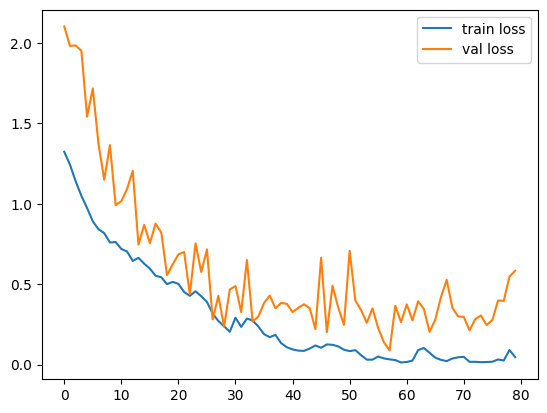

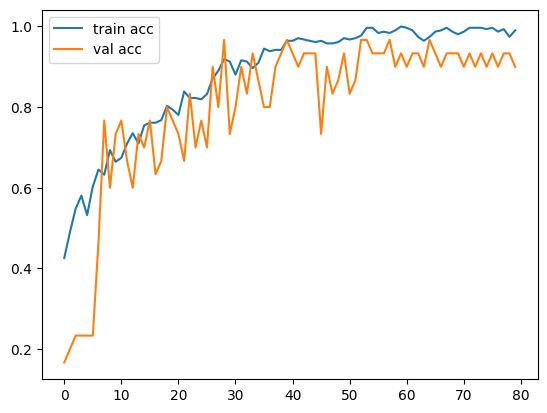

<Figure size 640x480 with 0 Axes>

In [72]:
# plot the loss
plt.plot(a.history['loss'], label='train loss')
plt.plot(a.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(a.history['accuracy'], label='train acc')
plt.plot(a.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [77]:
# Lưu a h5 file
model.save('/content/drive/MyDrive/AI/5_Flowers/model_inception.h5')

In [78]:
os.chdir('/content/drive/MyDrive/AI/5_Flowers/Valid')

{'Cúc': 0, 'Mai': 1, 'Rose': 2, 'Sen': 3, 'Tulip': 4}

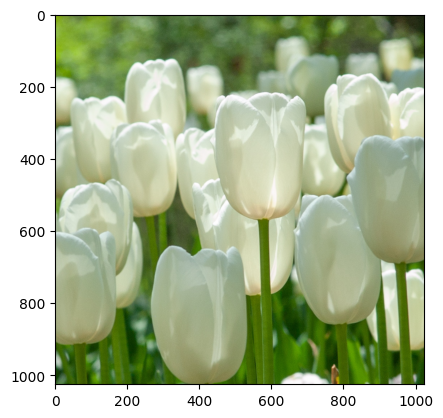

In [80]:
img_data = load_img('/content/drive/MyDrive/AI/5_Flowers/Valid/Anh5.jpg')
img_data = img_to_array(img_data)
plt.imshow(img_data/255)
training_set.class_indices

In [81]:
training_set.class_indices

{'Cúc': 0, 'Mai': 1, 'Rose': 2, 'Sen': 3, 'Tulip': 4}

Chọn image : Anh1
1/1 [==============================] - 0s 19ms/step
[[1. 0. 0. 0. 0.]]
Cúc
Chọn image : Anh2
1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 1. 0.]]
Sen
Chọn image : Anh3
1/1 [==============================] - 0s 27ms/step
[[0. 0. 0. 1. 0.]]
Sen
Chọn image : Anh4
1/1 [==============================] - 0s 18ms/step
[[0. 0. 1. 0. 0.]]
Rose
Chọn image : Anh5
1/1 [==============================] - 0s 20ms/step
[[1. 0. 0. 0. 0.]]
Cúc
Chọn image : Anh6
Tên của hình ảnh không tồn tại 


KeyboardInterrupt: ignored

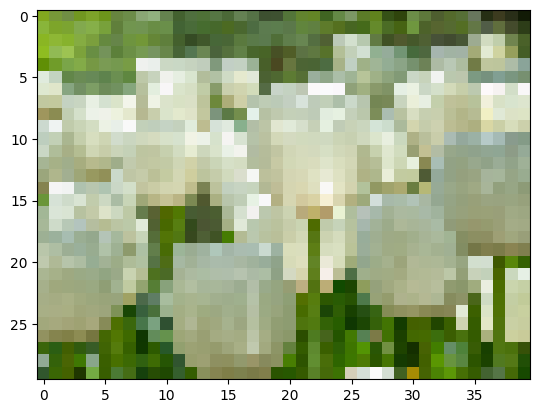

In [84]:
while 1 :
 ch = input('Chọn' ' image : ')
 if (ch=='-'):
     break
 else:
   try: 
     test_image = load_img("/content/drive/MyDrive/AI/5_Flowers/Valid/{}.jpg".format(ch),
                             target_size=(30,40)) #Scale
     test_image = img_to_array(test_image)
     plt.imshow(test_image/255)
     test_image = np.expand_dims(test_image,axis=0)
     result = model.predict(test_image)
     training_set.class_indices
     print(result)
     x=0
     c=0
     i=0
     while (i<5):
       if result[0][i]>=x:
         x=result[0][i]
         c=i
        
       i=i+1
     if (x<=0 and c>=5) :
         c=5
     if c == 0:
       prediction = 'Cúc'
     elif c == 1:
       prediction = 'Mai'
     elif c == 2:
       prediction = 'Rose'
     elif c == 3:
       prediction = 'Sen'
     elif c == 4:
       prediction = 'Tulip'
           
     print(prediction)
   except:
      print('Tên của hình ảnh không tồn tại '  )
